In [0]:
#@title . {display-mode: "form"}

# ###Details to Jupyter education
# The following sites provide guides to using Jupyter notebooks for educational means:
# * https://jupyter4edu.github.io/jupyter-edu-book/index.html
# * https://github.com/jperkel/example_notebook
# * https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks#mathematics-physics-chemistry-biology
# * https://github.com/binder-examples/
# * https://nbviewer.jupyter.org/
# * https://jupyter.readthedocs.io/en/latest/index.html

# more on cobrapy:
# * https://cobrapy.readthedocs.io/en/latest/getting_started.html

# further material with cameo:
# !pip install cameo


# Seminar Quantitative Mikrobiologie
## Hands-on simulation genome scale metabolic models

The seminar is supposed to give you insight of how to work with genome scale metabolic models (GSMM) of micro-organisms. The goal is to get suggestions for genetic manipulation in order to over-produce the metabolite ???.

The seminar uses Jupyter notebooks, a new way to use and visualize code in the web. Such a notebook is composed of a sequence of cells. Cellls can be either text/comments, like this introduction, or it contains python code to be run. In this example the code is evaluated by the cloud service [Binder](https://mybinder.org/). The output for each code-cell is shown directly below it. For a overview on Jupyter notebooks read [this review](https://www.nature.com/articles/d41586-018-07196-1).

The content of the seminar is adapted from a tutorial by the project Data-Driven Design of Cell Factories and Communities (DD-DeCaF) as well as workshop information available [here](https://biosustain.github.io/cell-factory-design-course/). More information on DD-DeDaF and the original files are [here](https://github.com/DD-DeCaF/tutorials). The simulations are performed using cobrapy (see [Ebrahim et al., 2013](https://doi.org/10.1186/1752-0509-7-74)), the most widely used analysis tool for genome scale metabolic models.

The steps of this tutorial are:
 * Set-up of compute environment
   * getting *E. coli* GSMM
 * Simulation of model performance
 * Manipulating the model

Skills you learn:
* Familiarizing with Jupyter notebooks
* Retrieving genome scale model files
* Manipulating and Simulating GSMM with cobrapy   



## Set-up compute environment

Before we can analyse GSMM, we have adjust the python environment that it integrates the cobrapy toolbox and downloading the GSMM.

### Git-Installation of cobrapy

In [15]:
!pip install git+https://github.com/opencobra/cobrapy;
from cobra.io import read_sbml_model

  Cloning https://github.com/opencobra/cobrapy to /tmp/pip-req-build-tvjkr_sv
  Running setup.py bdist_wheel for cobra ... - \ | / done
  Stored in directory: /tmp/pip-ephem-wheel-cache-s96ndori/wheels/2e/ee/1f/64b67efcfae5b2fa20cf92cc1ffca40a42b60e7a44d1a3efa3
Successfully built cobra


### GSMM Download from BIGG

In the following we download the *E. coli* model iJO1366 ([Orth et al., 2011](http://dx.doi.org/10.1038/msb.2011.65)).

In [3]:
!wget http://bigg.ucsd.edu/static/models/iJO1366.xml.gz

--2019-01-08 09:43:51--  http://bigg.ucsd.edu/static/models/iJO1366.xml.gz
Resolving bigg.ucsd.edu (bigg.ucsd.edu)... 132.239.8.55
Connecting to bigg.ucsd.edu (bigg.ucsd.edu)|132.239.8.55|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 395496 (386K) [application/gzip]
Saving to: ‘iJO1366.xml.gz’

iJO1366.xml.gz      100%[===================>] 386.23K  1.43MB/s    in 0.3s    

2019-01-08 09:43:52 (1.43 MB/s) - ‘iJO1366.xml.gz’ saved [395496/395496]



## Simulation of model performance

First we have a look at general features of the model. Then we check which reaction is optimized and perform a simulation to find the optimal flux distribution to maximize the optimized reaction.

### Inspection of model features

Converting the GSMM file from the BIGG database into the 'model' data-structure that can be evaluated by the cobrapy toolbox.

In [0]:
model = read_sbml_model('iJO1366.xml.gz')

Just calling the variable 'model' shows some basic features of the model.

In [16]:
model

Name,iJO1366
Memory address,0x07f7dc0c7ae48
Number of metabolites,1805
Number of reactions,2583
Objective expression,1.0*BIOMASS_Ec_iJO1366_core_53p95M - 1.0*BIOMASS_Ec_iJO1366_core_53p95M_reverse_5c8b1
Compartments,"cytosol, extracellular space, periplasm"


Display model objective (a reverse reaction is present as well, just for mathematical reasons)

In [31]:
print(model.objective)
# model.reactions.query("BIOMASS")

Maximize
1.0*BIOMASS_Ec_iJO1366_core_53p95M - 1.0*BIOMASS_Ec_iJO1366_core_53p95M_reverse_5c8b1


generate a visualization of the stoichiometric matrix

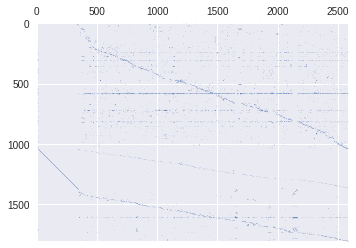

In [42]:
from cobra.util import create_stoichiometric_matrix
import matplotlib.pyplot as plt
%matplotlib inline

stoich_matrix = create_stoichiometric_matrix(model)
plt.spy(stoich_matrix, precision=0.01, markersize=.2)

### Details to metabolite glyceraldehyde-3-phosphate

In the following we extract information of cytoplasmic glyceraldehyde-3-phosphate.
Finding metabolites that contain 'g3p_c'.

In [39]:
model.metabolites.query('g3p_c')

[<Metabolite 1ddecg3p_c at 0x7f7dc0b95e10>,
 <Metabolite 1hdec9eg3p_c at 0x7f7dc0b95e80>,
 <Metabolite 1hdecg3p_c at 0x7f7dc0b95f60>,
 <Metabolite 1odec11eg3p_c at 0x7f7dc0b95f28>,
 <Metabolite 1odecg3p_c at 0x7f7dc0b46080>,
 <Metabolite 1tdec7eg3p_c at 0x7f7dc0b46358>,
 <Metabolite 1tdecg3p_c at 0x7f7dc0b463c8>,
 <Metabolite 2ddecg3p_c at 0x7f7dc0b57b70>,
 <Metabolite 2hdec9eg3p_c at 0x7f7dc0b681d0>,
 <Metabolite 2hdecg3p_c at 0x7f7dc0b68240>,
 <Metabolite 2odec11eg3p_c at 0x7f7dc0b68eb8>,
 <Metabolite 2odecg3p_c at 0x7f7dc0b68f28>,
 <Metabolite 2tdec7eg3p_c at 0x7f7dc0b6df28>,
 <Metabolite 2tdecg3p_c at 0x7f7dc0b74080>,
 <Metabolite 3ig3p_c at 0x7f7dc0b0b3c8>,
 <Metabolite eig3p_c at 0x7f7dc0a607b8>,
 <Metabolite g3p_c at 0x7f7dc0a7abe0>]

More specific information

In [27]:
model.metabolites.get_by_id('g3p_c')

# model.metabolites.g3p_c.reactions
## displays all reactions associated with g3p_c
## dot notation only works for 'proper' variable names, i.e. not for names starting with numbers (e.g. 10fthf_c)

Metabolite identifier,g3p_c
Name,Glyceraldehyde 3-phosphate
Memory address,0x07f7dc0a7abe0
Formula,C3H5O6P
Compartment,c
In 14 reaction(s),"FBA, DRPA, TALA, TRPS3, TGBPA, GAPD, TKT1, TRPS1, DDPGALA, TKT2, EDA, TPI, F6PA, DXPS"


Explicit list of reactions with reactants

In [29]:
for reaction in model.metabolites.g3p_c.reactions:
    print(reaction, reaction.name)

FBA: fdp_c <=> dhap_c + g3p_c Fructose-bisphosphate aldolase
DRPA: 2dr5p_c --> acald_c + g3p_c Deoxyribose-phosphate aldolase
TALA: g3p_c + s7p_c <=> e4p_c + f6p_c Transaldolase
TRPS3: 3ig3p_c --> g3p_c + indole_c Tryptophan synthase (indoleglycerol phosphate)
TGBPA: tagdp__D_c <=> dhap_c + g3p_c Tagatose-bisphosphate aldolase
GAPD: g3p_c + nad_c + pi_c <=> 13dpg_c + h_c + nadh_c Glyceraldehyde-3-phosphate dehydrogenase
TKT1: r5p_c + xu5p__D_c <=> g3p_c + s7p_c Transketolase
TRPS1: 3ig3p_c + ser__L_c --> g3p_c + h2o_c + trp__L_c Tryptophan synthase (indoleglycerol phosphate)
DDPGALA: 2dh3dgal6p_c <=> g3p_c + pyr_c 2-dehydro-3-deoxy-6-phosphogalactonate aldolase
TKT2: e4p_c + xu5p__D_c <=> f6p_c + g3p_c Transketolase
EDA: 2ddg6p_c --> g3p_c + pyr_c 2-dehydro-3-deoxy-phosphogluconate aldolase
TPI: dhap_c <=> g3p_c Triose-phosphate isomerase
F6PA: f6p_c <=> dha_c + g3p_c Fructose 6-phosphate aldolase
DXPS: g3p_c + h_c + pyr_c --> co2_c + dxyl5p_c 1-deoxy-D-xylulose 5-phosphate synthase


Investigating a particular reaction: GAPD
GPR shows the 'Gene-Protein-Reaction' relationship

In [30]:
model.reactions.GAPD

Reaction identifier,GAPD
Name,Glyceraldehyde-3-phosphate dehydrogenase
Memory address,0x07f7dbfb00898
Stoichiometry,g3p_c + nad_c + pi_c <=> 13dpg_c + h_c + nadh_c Glyceraldehyde 3-phosphate + Nicotinamide adenine dinucleotide + Phosphate <=> 3-Phospho-D-glyceroyl phosphate + H+ + Nicotinamide adenine dinucleotide - reduced
GPR,b1779
Lower bound,-1000.0
Upper bound,1000.0


### Output of medium composition

Here 

In [44]:
model.medium

{'EX_ca2_e': 1000.0,
 'EX_cbl1_e': 0.01,
 'EX_cl_e': 1000.0,
 'EX_co2_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_glc__D_e': 10.0,
 'EX_h2o_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_na1_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_ni2_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_pi_e': 1000.0,
 'EX_sel_e': 1000.0,
 'EX_slnt_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_tungs_e': 1000.0,
 'EX_zn2_e': 1000.0}

### Simulation of optimal growth

In [0]:
# model.solver
solution = model.optimize()

Models solved using FBA can be further analyzed by using summary methods, which output printed text to give a quick representation of model behavior. Calling the summary method on the entire model displays information on the input and output behavior of the model, along with the optimized objective.

In [45]:
model.summary()
# solution.fluxes.BIOMASS_Ec_iJO1366_core_53p95M
# solution.fluxes.ATPM

IN FLUXES            OUT FLUXES    OBJECTIVES
-------------------  ------------  ----------------------
o2_e      17.6       h2o_e  45.6   BIOMASS_Ec_i...  0.982
nh4_e     10.6       co2_e  19.7
glc__D_e  10         h_e     9.03
pi_e       0.948
so4_e      0.248
k_e        0.192
fe2_e      0.0158
mg2_e      0.00852
ca2_e      0.00511
cl_e       0.00511
cu2_e      0.000697
mn2_e      0.000679
zn2_e      0.000335
ni2_e      0.000317
mobd_e     0.000127


In addition, the input-output behavior of individual metabolites can also be inspected using summary methods. For instance, the following commands can be used to examine the overall redox balance of the model.

In [47]:
model.metabolites.nadh_c.summary()

PRODUCING REACTIONS -- Nicotinamide adenine dinucleotide - reduced (nadh_c)
---------------------------------------------------------------------------
%      FLUX  RXN ID    REACTION
---  ------  --------  --------------------------------------------------
46%  16.3    GAPD      g3p_c + nad_c + pi_c <=> 13dpg_c + h_c + nadh_c
23%   7.97   PDH       coa_c + nad_c + pyr_c --> accoa_c + co2_c + nadh_c
14%   4.83   MDH       mal__L_c + nad_c <=> h_c + nadh_c + oaa_c
11%   3.8    AKGDH     akg_c + coa_c + nad_c --> co2_c + nadh_c + succ...
5%    1.69   PGCD      3pg_c + nad_c --> 3php_c + h_c + nadh_c
1%    0.443  IPMD      3c2hmp_c + nad_c --> 3c4mop_c + h_c + nadh_c

CONSUMING REACTIONS -- Nicotinamide adenine dinucleotide - reduced (nadh_c)
---------------------------------------------------------------------------
%      FLUX  RXN ID    REACTION
---  ------  --------  --------------------------------------------------
89%  31      NADH16pp  4.0 h_c + nadh_c + q8_c --> 3.0 h_p + nad_c +

Or to get a sense of the main energy production and consumption reactions

In [48]:
model.metabolites.atp_c.summary()

PRODUCING REACTIONS -- ATP C10H12N5O13P3 (atp_c)
------------------------------------------------
%      FLUX  RXN ID      REACTION
---  ------  ----------  --------------------------------------------------
70%  55.8    ATPS4rpp    adp_c + 4.0 h_p + pi_c <=> atp_c + h2o_c + 3.0 h_c
20%  16.3    PGK         3pg_c + atp_c <=> 13dpg_c + adp_c
5%    4.01   PPK         atp_c + pi_c <=> adp_c + ppi_c
4%    3.29   SUCOAS      atp_c + coa_c + succ_c <=> adp_c + pi_c + succoa_c

CONSUMING REACTIONS -- ATP C10H12N5O13P3 (atp_c)
------------------------------------------------
%      FLUX  RXN ID      REACTION
---  ------  ----------  --------------------------------------------------
67%  53.2    BIOMASS...  0.000223 10fthf_c + 2.6e-05 2fe2s_c + 0.000223 ...
9%    6.92   PFK         atp_c + f6p_c --> adp_c + fdp_c + h_c
5%    3.93   ADK1        amp_c + atp_c <=> 2.0 adp_c
4%    3.15   ATPM        atp_c + h2o_c --> adp_c + h_c + pi_c
2%    1.78   GLNS        atp_c + glu__L_c + nh4_c --> adp_c + 

## Manipulation of the model

### Setting new objective

The objective function is determined from the objective_coefficient attribute of the objective reaction(s). Generally, a “biomass” function which describes the composition of metabolites which make up a cell is used.

The objective function can be changed by assigning Model.objective, which can be a reaction object (or just it’s name)

In [49]:
# copy model to a new name
ATPmodel = model.copy()

# change the objective to ATPM
ATPmodel.objective = 'ATPM'

# The upper bound should be 1000, so that we get
# the actual optimal value
ATPmodel.reactions.get_by_id('ATPM').upper_bound = 1000.

# simulation of fluxes for new objective
ATPmodel.optimize().objective_value


234.99999999999986

## Questions

 which reactions includes cytosolic atp? model.?.atp_c.?
 
 which metabolite is named adenosine model.metabolites.?(?,?)

which genes are necessary for PFK reaction? model.?.?.? 

Which metabolites are superfluous in the original medium composition based on the exchanged metabolites determined by the FBA?